https://www.kaggle.com/patelprashant/employee-attrition

Context

The key to success in any organization is attracting and retaining top talent. I’m an HR analyst at my company, and one of my tasks is to determine which factors keep employees at my company and which prompt others to leave. I need to know what factors I can change to prevent the loss of good people. Watson Analytics is going to help.
Content

I have data about past and current employees in a spreadsheet on my desk top. It has various data points on our employees, but I’m most interested in whether they’re still with my company or whether they’ve gone to work somewhere else. And I want to understand how this relates to workforce attrition.

Education
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance
1 'Bad' 2 'Good' 3 'Better' 4 'Best'


Acknowledgements

https://www.ibm.com/communities/analytics/watson-analytics-blog/watson-analytics-use-case-for-hr-retaining-valuable-employees/

Inspiration

Which factors led to employee attrition?

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

In [59]:
emp = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# This dataset is very clean :)

In [60]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [61]:
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [62]:
emp.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [69]:
emp['Over18'].value_counts()

KeyError: 'Over18'

In [64]:
emp.drop(['EmployeeCount','Over18'],axis=1,inplace=True)

In [65]:
emp['Age_bins']=pd.cut(emp['Age'],bins=5).values

In [66]:
emp['Age_bins'].value_counts().sort_index()

(17.958, 26.4]    162
(26.4, 34.8]      489
(34.8, 43.2]      472
(43.2, 51.6]      223
(51.6, 60.0]      124
Name: Age_bins, dtype: int64

In [70]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EmployeeNumber            1470 non-null   int64   
 9   EnvironmentSatisfaction   1470 non-null   int64   
 10  Gender                    1470 non-null   object  
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   int64   
 13  JobLevel                  1470 non-null   int64 

In [90]:
emp[['Education','EducationField']]

,Education,EducationField
0,2,Life Sciences
1,1,Life Sciences
2,2,Other
3,4,Life Sciences
4,1,Medical
...,...,...
1465,2,Medical
1466,1,Medical
1467,3,Life Sciences
1468,3,Medical


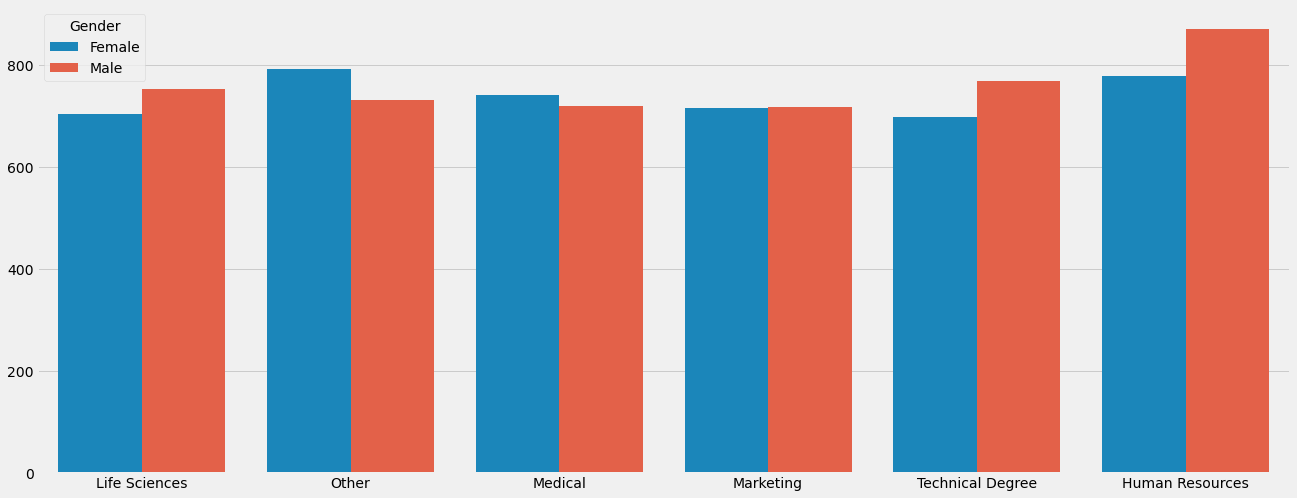

In [97]:
plt.figure(figsize=(20,8))
sns.barplot(emp['EducationField'].values,
            emp['EducationField'].index,
            hue=emp['Gender'],
            ci=None)


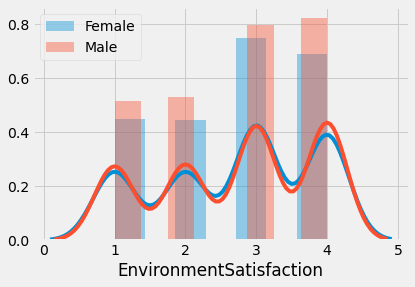

In [89]:
sns.distplot(emp[emp['Gender'] == 'Female']['EnvironmentSatisfaction'],label='Female')
sns.distplot(emp[emp['Gender'] == 'Male']['EnvironmentSatisfaction'],label='Male')
plt.legend()

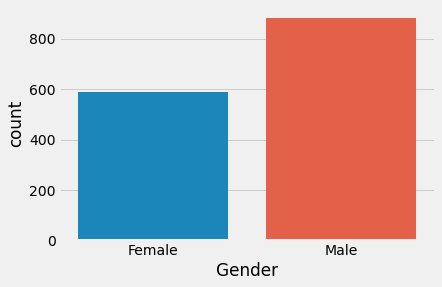

In [73]:
sns.countplot(emp['Gender'])

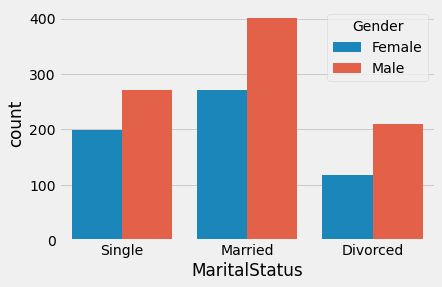

In [80]:
sns.countplot(emp['MaritalStatus'],hue=emp['Gender'])

In [79]:
emp['TotalWorkingYears'].median()

10.0

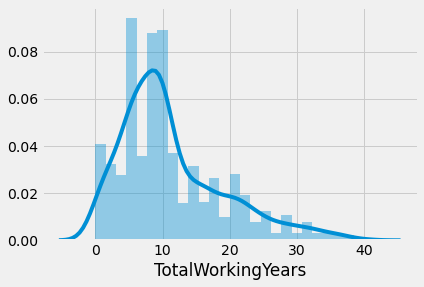

In [75]:
sns.distplot(emp['TotalWorkingYears'])

In [163]:
numerical_columns = list(emp.select_dtypes(include='int64').columns)

In [164]:
emp[numerical_columns].corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [168]:
numerical_columns.append('Attrition')

In [175]:
new = emp[numerical_columns]

In [ ]:
sns.pairplot(new.iloc[:,::2],hue='Attrition')

In [48]:
emp['Attrition'].replace({'Yes':1,
                          'No':0},
                         inplace=True)

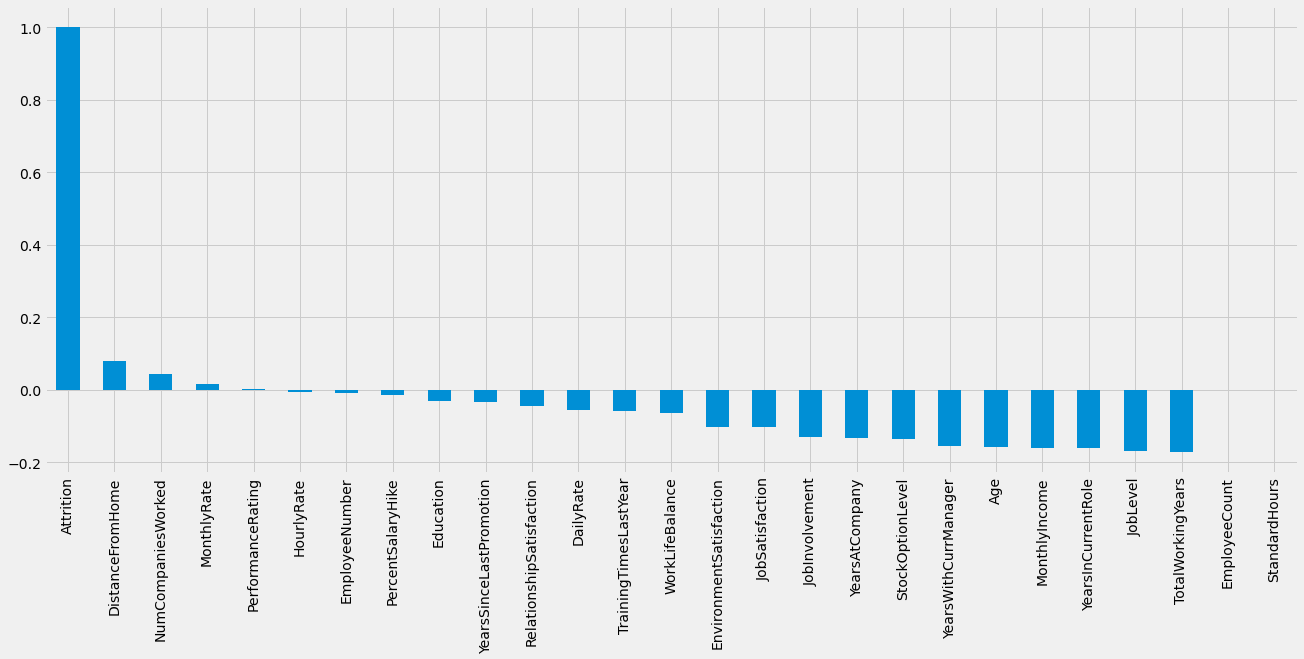

In [49]:
plt.figure(figsize=(20,8))
emp.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar')

In [50]:
categorical_columns = list(emp.select_dtypes(include='object').columns)

In [51]:
emp[categorical_columns]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


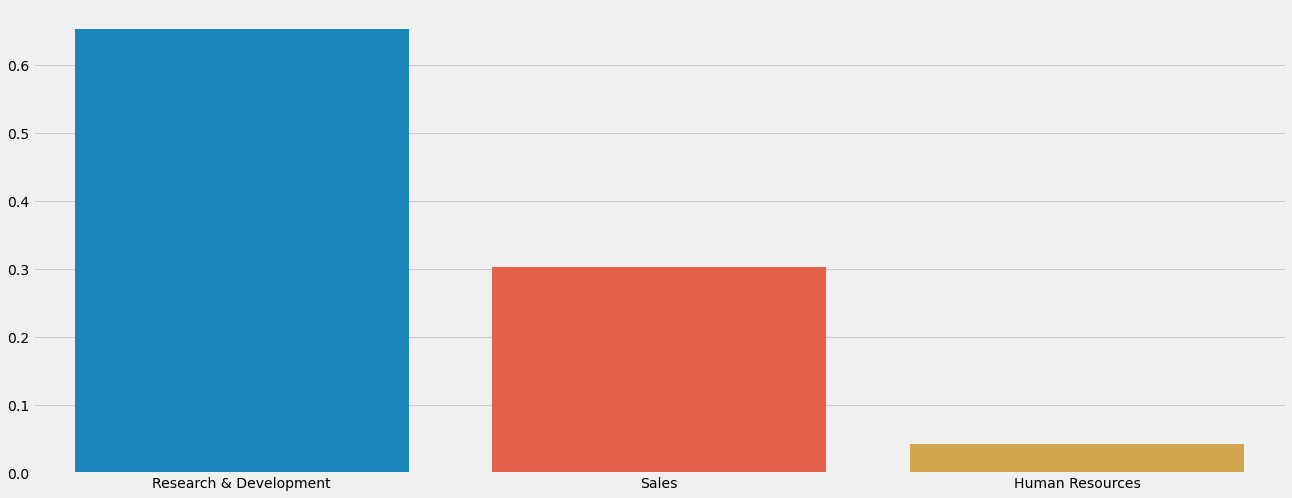

In [95]:
plt.figure(figsize=(20,8))
sns.barplot(emp['Department'].value_counts(normalize=True).index,
            emp['Department'].value_counts(normalize=True).values)

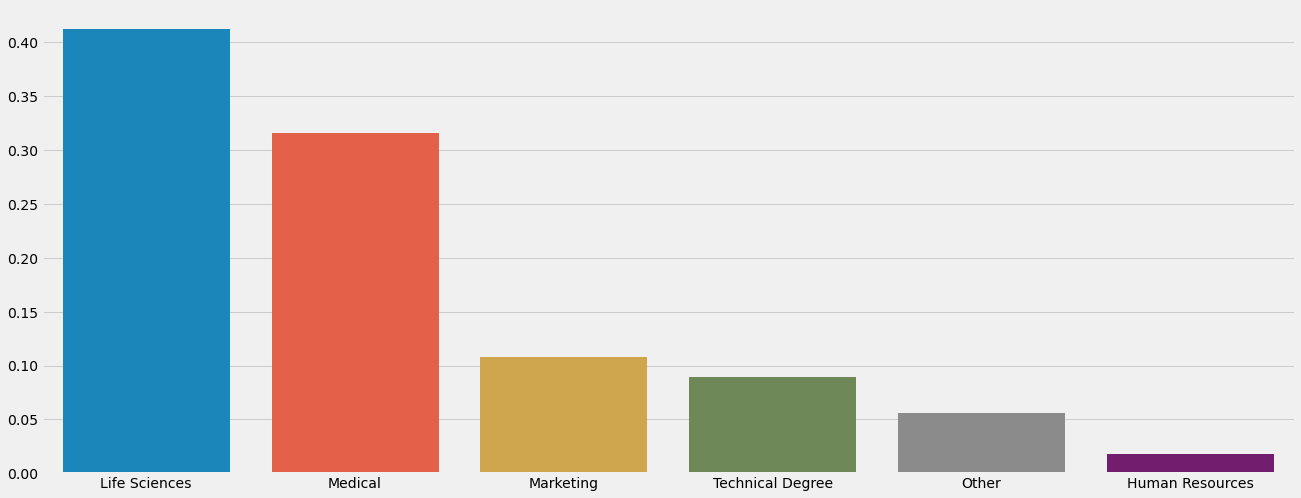

In [74]:
plt.figure(figsize=(20,8))
sns.barplot(emp['EducationField'].value_counts(normalize=True).index,
            emp['EducationField'].value_counts(normalize=True).values)

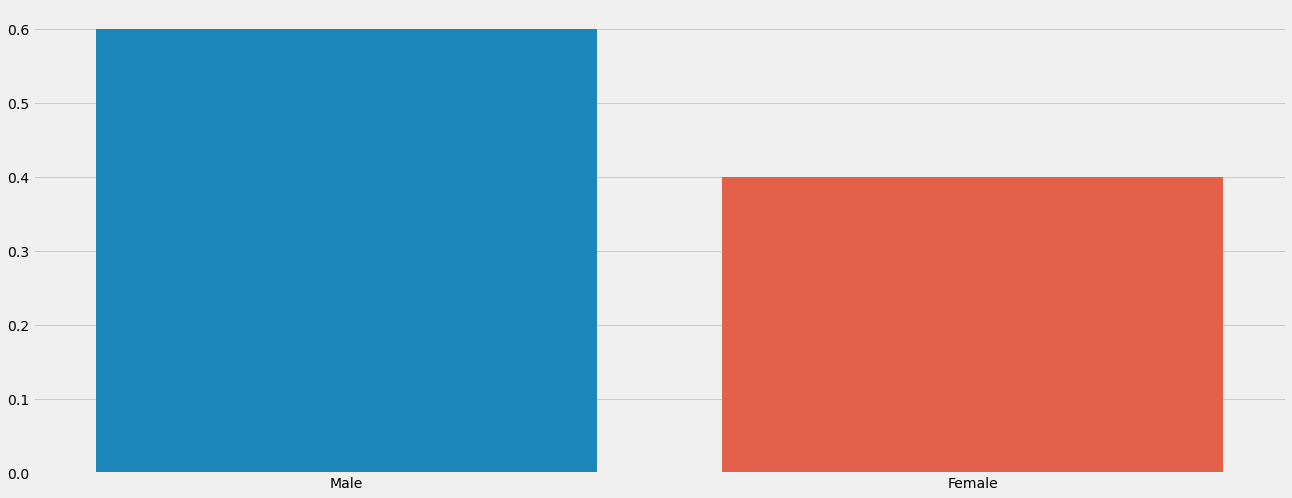

In [75]:
plt.figure(figsize=(20,8))
sns.barplot(emp['Gender'].value_counts(normalize=True).index,
            emp['Gender'].value_counts(normalize=True).values)

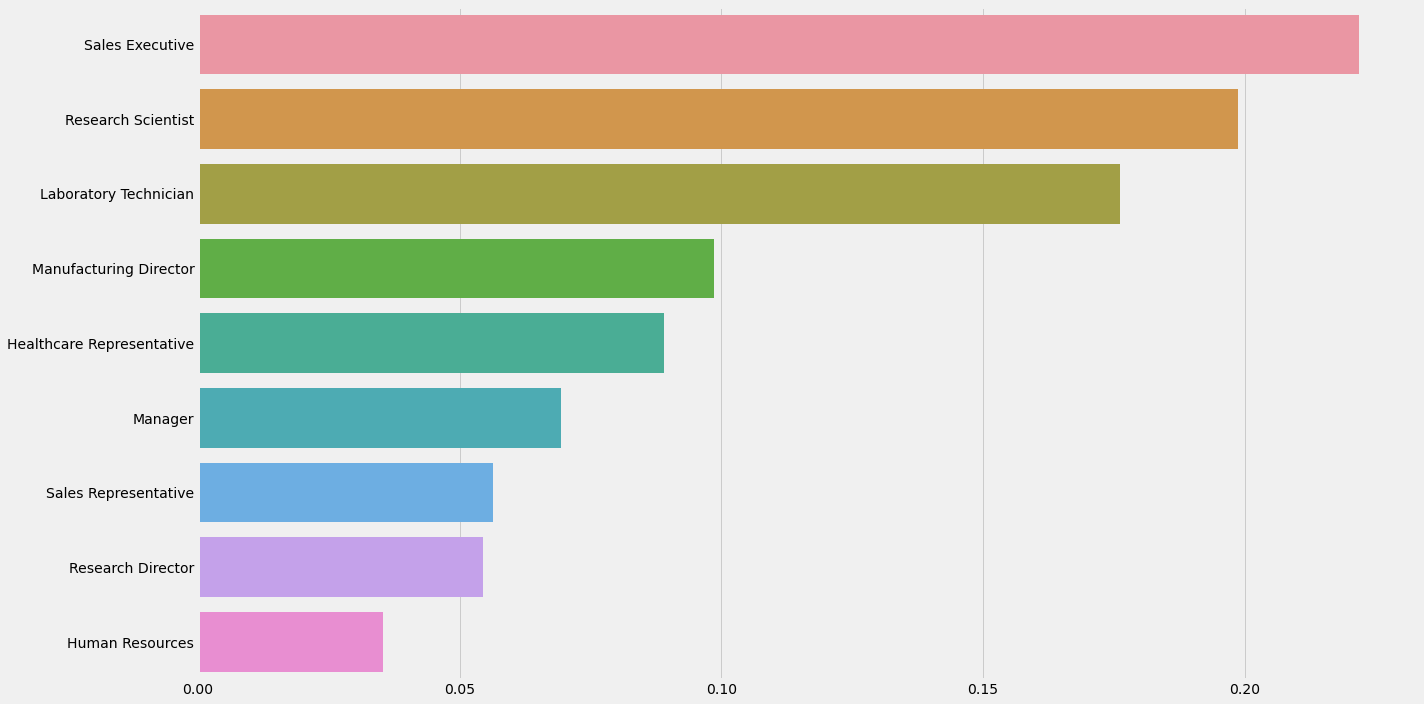

In [90]:
plt.figure(figsize=(20,10))
sns.barplot(emp['JobRole'].value_counts(normalize=True).values,
            emp['JobRole'].value_counts(normalize=True).index)
plt.tight_layout()


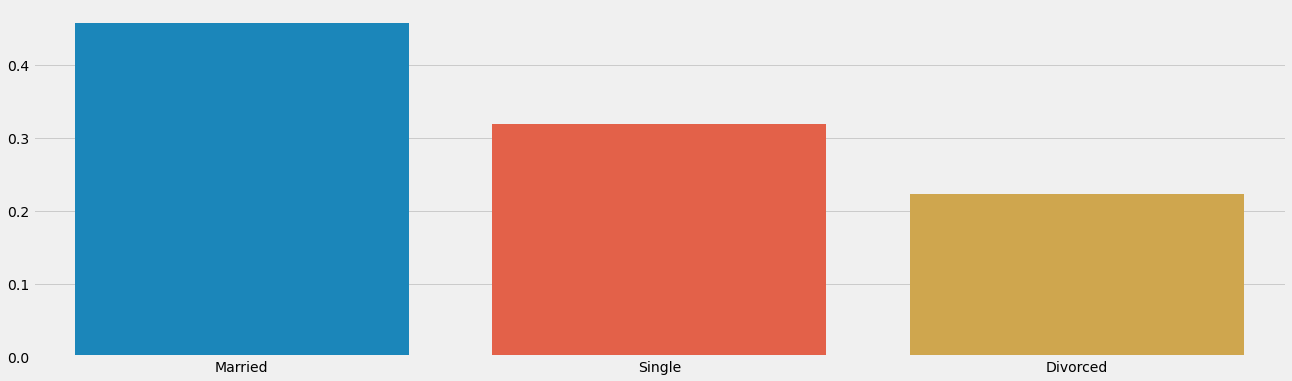

In [81]:
plt.figure(figsize=(20,6))
sns.barplot(emp['MaritalStatus'].value_counts(normalize=True).index,
            emp['MaritalStatus'].value_counts(normalize=True).values)

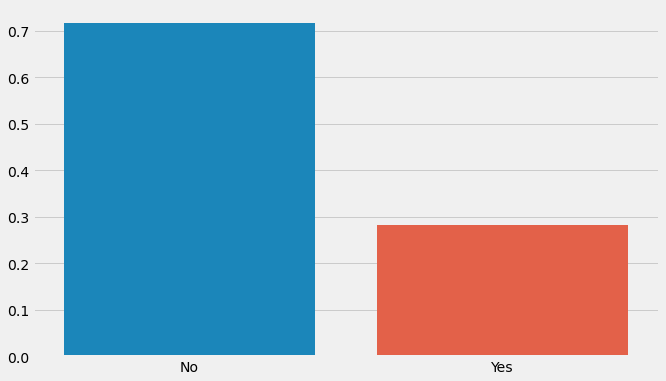

In [82]:
plt.figure(figsize=(10,6))
sns.barplot(emp['OverTime'].value_counts(normalize=True).index,
            emp['OverTime'].value_counts(normalize=True).values)

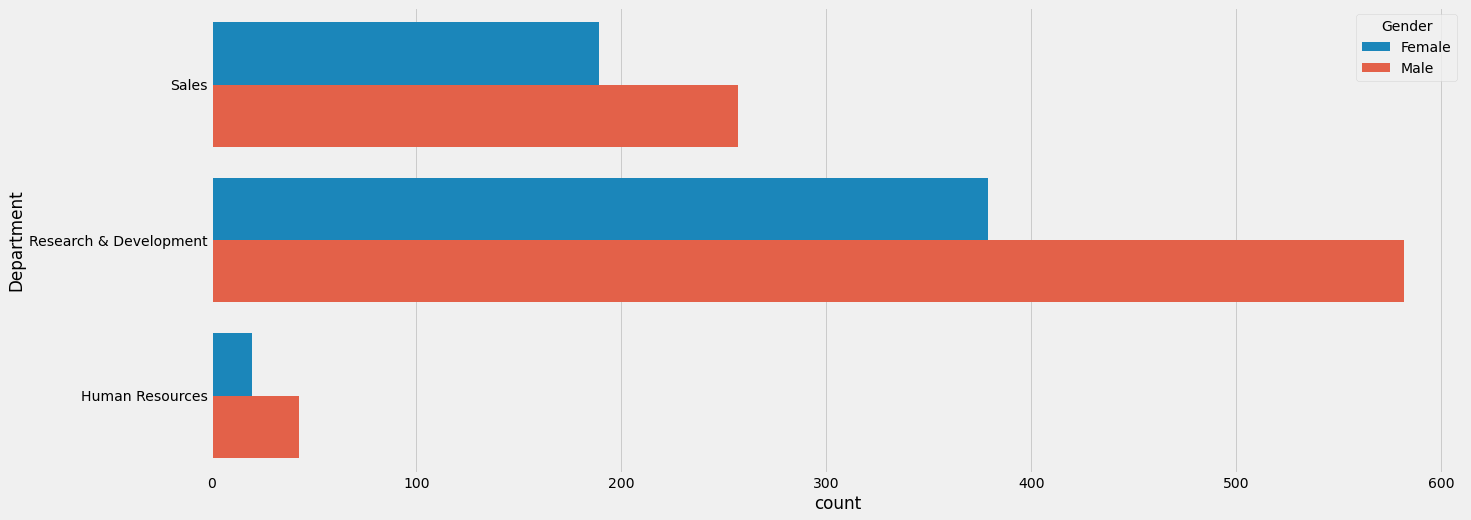

In [98]:
plt.figure(figsize=(20,8))
sns.countplot(y=emp['Department'],hue=emp['Gender'])

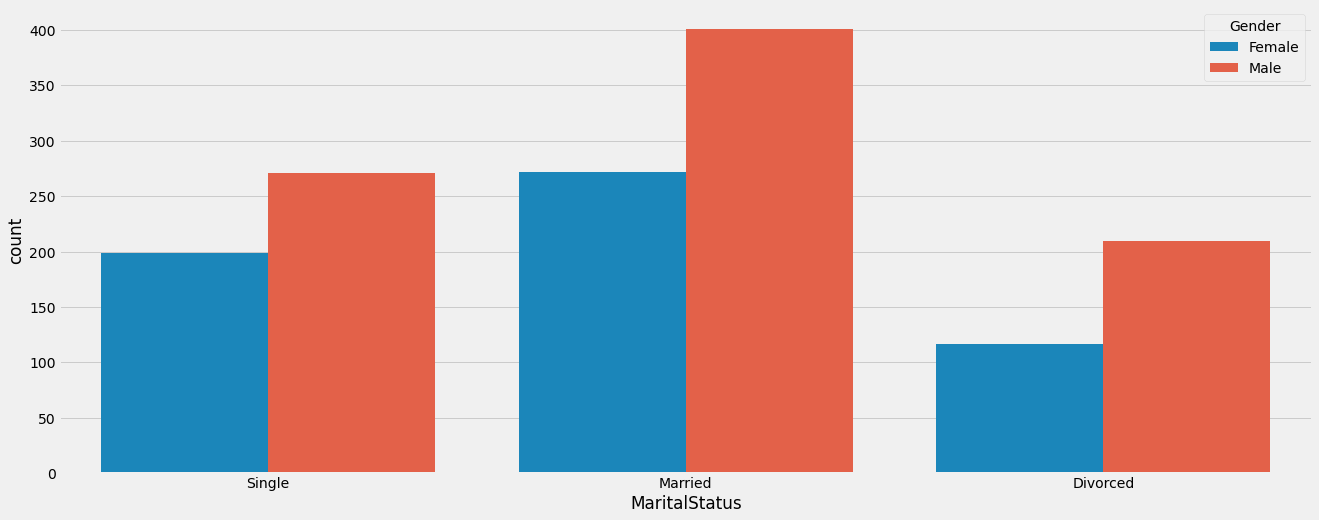

In [101]:
plt.figure(figsize=(20,8))
sns.countplot(x=emp['MaritalStatus'],hue=emp['Gender'])